In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
df = pd.read_csv('/home/tang/Documents/DSBA/ML/sarcasm/sarcasm_data_preprocessed.csv')
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,clean_com,clean_parent_com
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...",nc and nh .,"yeah , i get that argument . at this point , i..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,you do know west team play against west team m...,the blazer and maverick ( the west < NUM > and...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.,"they were underdog earlier today , but since g...",they 're favored to win .
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz,this meme is n't funny none of the `` new york...,deadass do n't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,i could use one of those tool .,yep can confirm i saw the tool they use for th...


In [2]:
df = df[['label', 'subreddit', 'score', 'ups', 'downs', 'clean_com', 'clean_parent_com']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010771 entries, 0 to 1010770
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   label             1010771 non-null  int64 
 1   subreddit         1010771 non-null  object
 2   score             1010771 non-null  int64 
 3   ups               1010771 non-null  int64 
 4   downs             1010771 non-null  int64 
 5   clean_com         1010765 non-null  object
 6   clean_parent_com  1010769 non-null  object
dtypes: int64(4), object(3)
memory usage: 54.0+ MB


In [3]:
df = df.dropna(subset=['clean_com'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010765 entries, 0 to 1010770
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   label             1010765 non-null  int64 
 1   subreddit         1010765 non-null  object
 2   score             1010765 non-null  int64 
 3   ups               1010765 non-null  int64 
 4   downs             1010765 non-null  int64 
 5   clean_com         1010765 non-null  object
 6   clean_parent_com  1010763 non-null  object
dtypes: int64(4), object(3)
memory usage: 61.7+ MB


In [4]:
X = df['clean_com']
y = df['label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
pipeline = Pipeline([
    ('vecto', TfidfVectorizer()),
    ('svm', LinearSVC(max_iter=2000))
])

In [8]:
param_grid_svm = {
    'vecto__max_features': [10000],
    'vecto__ngram_range': [(1,2)],
    'svm__C': [0.1]
}

grid_search_svm = GridSearchCV(pipeline, param_grid_svm, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vecto', TfidfVectorizer()),
                                       ('svm', LinearSVC(max_iter=2000))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1], 'vecto__max_features': [10000],
                         'vecto__ngram_range': [(1, 2)]},
             scoring='accuracy')

In [9]:
best_model = grid_search_svm.best_estimator_
print("Best Parameters:", grid_search_svm.best_params_)

y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters: {'svm__C': 0.1, 'vecto__max_features': 10000, 'vecto__ngram_range': (1, 2)}
Accuracy: 0.7054458751539675
              precision    recall  f1-score   support

           0       0.69      0.75      0.72    101080
           1       0.73      0.66      0.69    101073

    accuracy                           0.71    202153
   macro avg       0.71      0.71      0.70    202153
weighted avg       0.71      0.71      0.70    202153



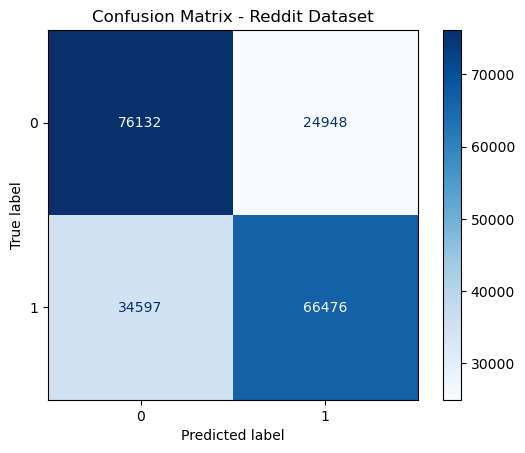

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix - Reddit Dataset")
plt.show()

In [11]:
df_twitter = df = pd.read_csv('/home/tang/Documents/DSBA/ML/sarcasm/Twitter_data_preprocessed.csv')
df_twitter.head()

,tweets,class
0,since there 's a lot of english teacher on ig ...,1
1,company profile emmanuel prince of peace churc...,0
2,completely stunned kam chancellor did n't win ...,0
3,"we have money < NUM > bomb , to over throw gov...",0
4,late dinner # happy # dinner # late # be # fat...,0


In [12]:
df_twitter['class'].value_counts()

class
1    20681
0    20681
Name: count, dtype: int64

In [13]:
X_twitter = df_twitter['tweets']
y_twitter = df_twitter['class']

In [14]:
y__twi_pred = best_model.predict(X_twitter)

print("Accuracy:", accuracy_score(y_twitter, y__twi_pred))
print(classification_report(y_twitter, y__twi_pred))

Accuracy: 0.745273439388811
              precision    recall  f1-score   support

           0       0.76      0.72      0.74     20681
           1       0.73      0.77      0.75     20681

    accuracy                           0.75     41362
   macro avg       0.75      0.75      0.75     41362
weighted avg       0.75      0.75      0.75     41362



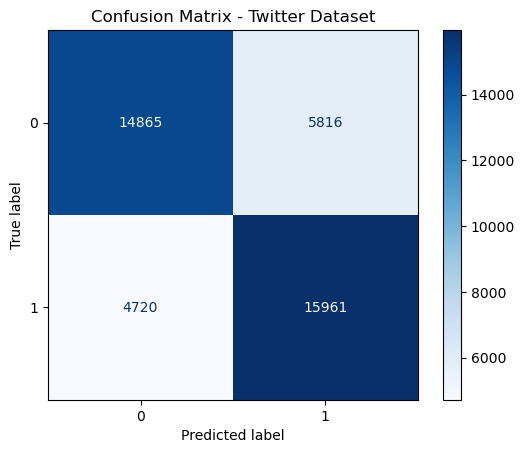

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_twitter, y__twi_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix - Twitter Dataset")
plt.show()

In [16]:
results_df = pd.DataFrame({
    "tweet": X_twitter,       
    "real": y_twitter,        
    "pred": y__twi_pred   
})

incorrect_df = results_df[results_df["real"] != results_df["pred"]]

sample_incorrect = incorrect_df.sample(n=10, random_state=42)
print(sample_incorrect)

                                                   tweet  real  pred
2123   glad to see people are voting for someone base...     0     1
1774   oh look at that ... the pot calling the kettle...     0     1
20608           now following kindly follow back # peace     0     1
26201  college paper 😅 so fun # sarcasm # igetdistrac...     0     1
10636  the 'guess which printer i printed to this tim...     1     0
34659  complete this job application , and then start...     1     0
18379                        i hate traffic bro . # late     0     1
8280   pretty much sum up the way i feel about today ...     1     0
14034  it 's more important to feel good about yourse...     0     1
38126  it 's refreshing to see the incompetence of th...     1     0
